In [59]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
warnings.filterwarnings("ignore")

In [2]:
SeqIO.convert("../../raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq", "../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02.fasta", "fasta")

279742

In [3]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq"))

In [4]:
NS3_FWD = Seq("GCAAGTCTGGTGCCAGCAGCC")
LR6_REV = Seq("CGCCAGTTCTGCTTACC")

279742


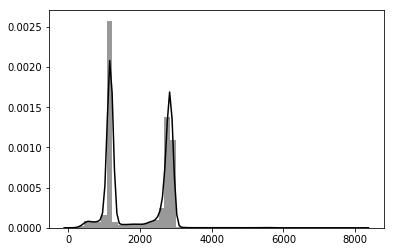

In [5]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print(len(fastq_dict))
sns.distplot(lengths, color="k")

In [6]:
long_ITS = fastq_dict
for key in fastq_dict.copy():
    if len(fastq_dict[key].seq) not in range(2000, 4001):
        del long_ITS[key]

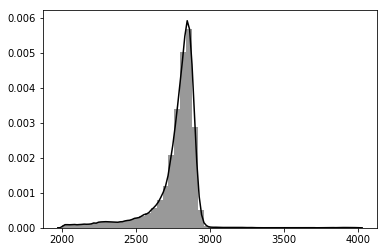

In [7]:
lengths_ITS = []
for key in long_ITS:
    lengths_ITS.append(len(long_ITS[key].seq))
sns.distplot(lengths_ITS, color='k')

In [8]:
# SeqIO.write(long_ITS.values(), "/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta")

In [9]:
fastq_ITS = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta"))

133755
133755


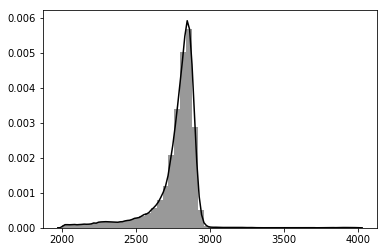

In [10]:
lengths = []
for key in fastq_ITS:
    lengths.append(len(fastq_ITS[key].seq))
print(len(fastq_ITS))
sns.distplot(lengths, color="k")
print(len(lengths))

In [11]:
m = Mothur()

In [12]:
m.help()

In [13]:
m.pcr.seqs(fasta='../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta', oligos='/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=0, rdiffs=0)

In [14]:
pcr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.pcr.fasta", "fasta"))

1827


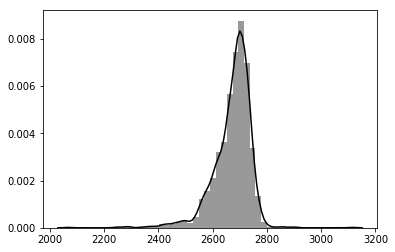

In [15]:
lengths_pcr = []
ids = []
for key in pcr_dict:
    lengths_pcr.append(len(pcr_dict[key].seq))
    ids.append(key)
sns.distplot(lengths_pcr, color='k')
print(len(lengths_pcr))

In [16]:
with open("../../analysis/descriptors/1827_ids.txt", "w") as f:
    for key in pcr_dict:
        f.write("%s\n" % pcr_dict[key].id)

1000


1000

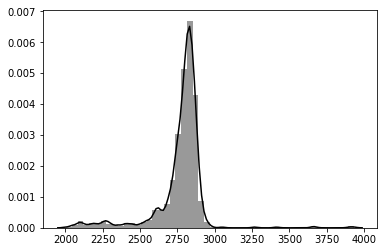

In [17]:
small_dict = {k: fastq_ITS[k] for k in list(fastq_ITS.keys())[:1000]}
lengths_small = []
for key in small_dict:
    lengths_small.append(len(small_dict[key].seq))
sns.distplot(lengths_small, color='k')
print(len(lengths_small))
SeqIO.write(small_dict.values(), "../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta", "fasta")

In [18]:
initial_file = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta'
base_name = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small%i.fasta'
for x in range(0, 10):
    infile=base_name %x
    copy(initial_file, infile)
    m.pcr.seqs(fasta=infile, oligos='../../analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=x, rdiffs=x)

Pdiffs value is 9
The number of values available is 319
Pdiffs value is 2
The number of values available is 125
Pdiffs value is 7
The number of values available is 315
Pdiffs value is 1
The number of values available is 74
Pdiffs value is 3
The number of values available is 175
Pdiffs value is 8
The number of values available is 317
Pdiffs value is 0
The number of values available is 29
Pdiffs value is 6
The number of values available is 312
Pdiffs value is 4
The number of values available is 228
Pdiffs value is 5
The number of values available is 268


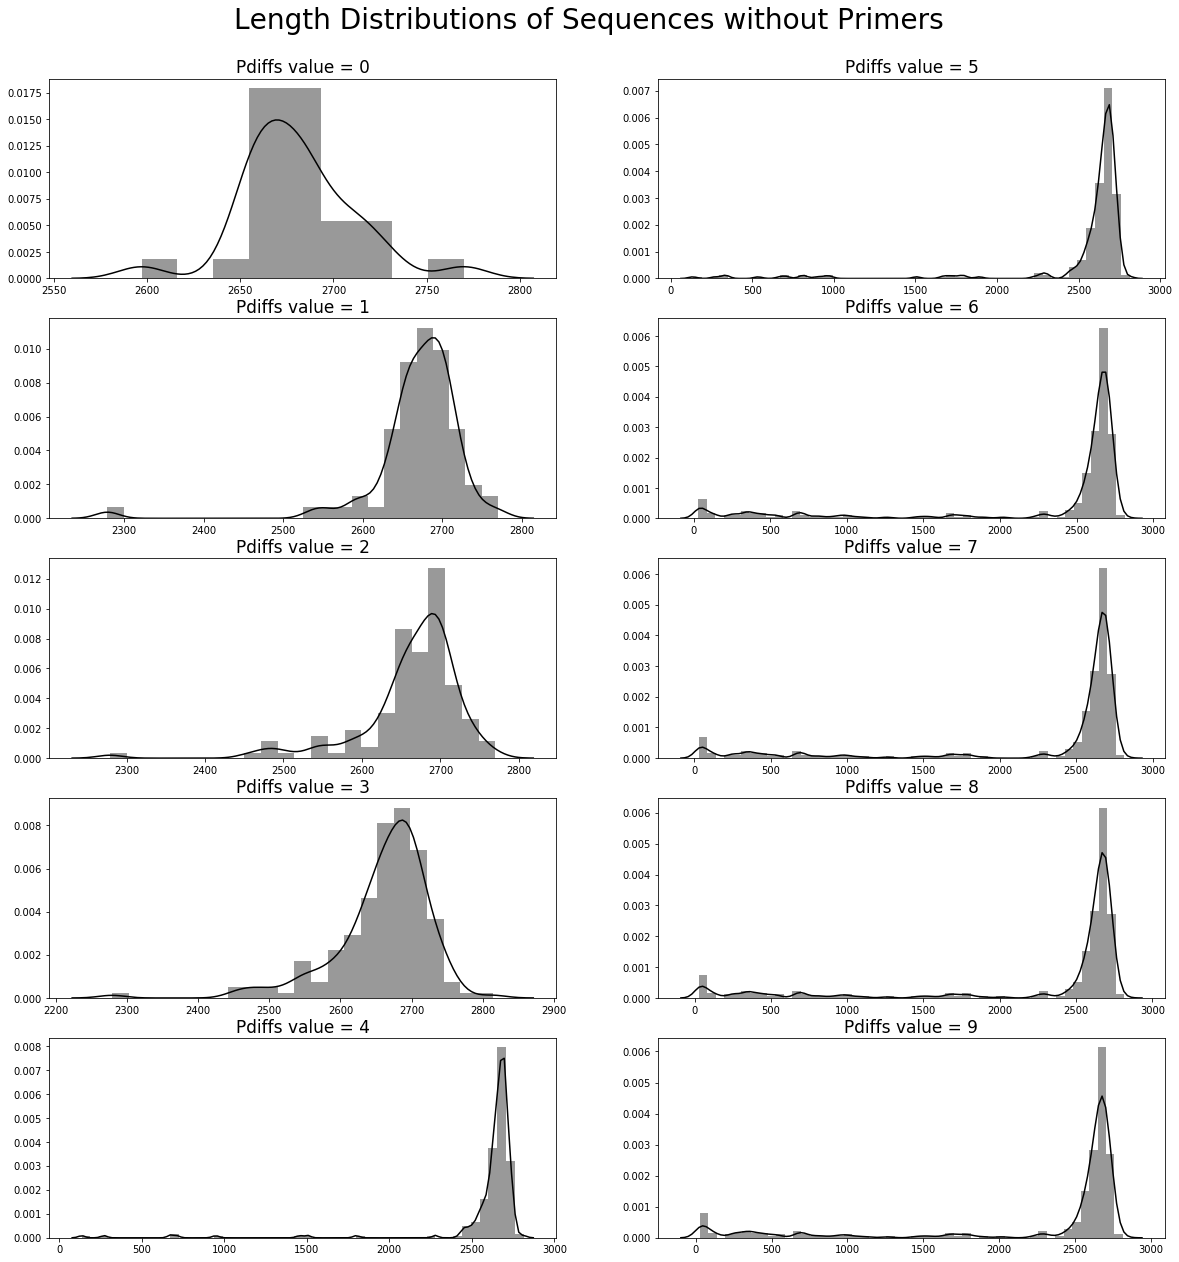

In [19]:
fg, ax = plt.subplots(5,2, figsize=(20,20))
fg.suptitle("Length Distributions of Sequences without Primers", fontsize=28)
fg.subplots_adjust(top=0.93)
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        print("Pdiffs value is", os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        print("The number of values available is", len(lengths_tmp))
        if pdiffs < 5:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs][0])
            ax[pdiffs][0].set_title(pdiffs_str, fontsize=17)
        else:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs - 5][1])
            ax[pdiffs - 5][1].set_title(pdiffs_str, fontsize=17)

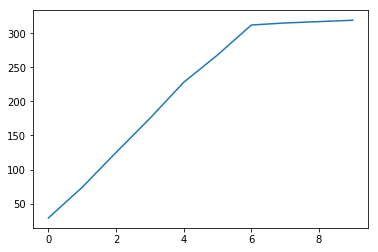

In [20]:
x = []
y = []
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        x.append(pdiffs)
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        y.append(len(lengths_tmp))
sns.lineplot(x, y)

In [21]:
qscores = []
ids = []
smallq_dict = {k: long_ITS[k] for k in list(long_ITS.keys())[:1000]}
for record in smallq_dict:
    ids.append(smallq_dict[record].id)
for key in smallq_dict:
    qscores.append((-10*np.log10(np.mean(10**(-1*np.array((smallq_dict[key].letter_annotations["phred_quality"]))/10)))))
smallq_qscores_dataframe = df(qscores, columns=["Mean"], index=ids)
lengths_smallq = []
for key in smallq_dict:
    lengths_smallq.append(len(smallq_dict[key].seq))

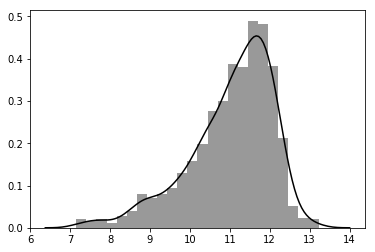

In [22]:
sns.distplot((qscores), color="k")

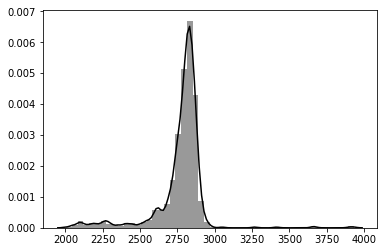

In [23]:
sns.distplot(lengths_smallq, color="k")

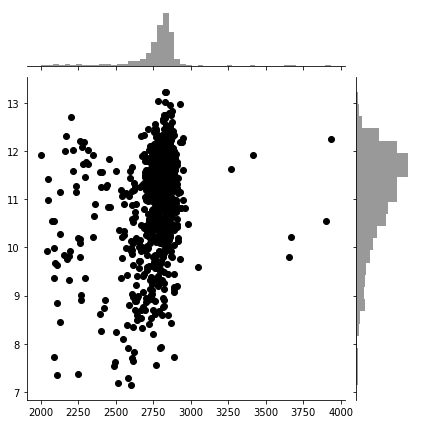

In [24]:
sns.jointplot(x=lengths_smallq, y=qscores, color="k")

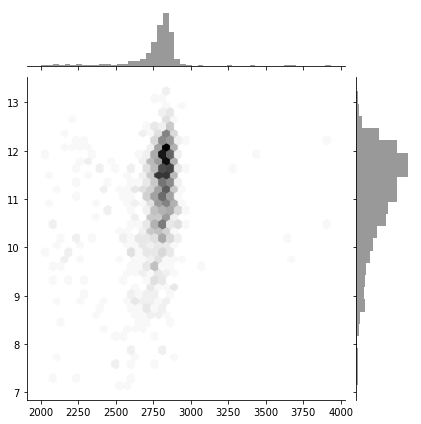

In [25]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

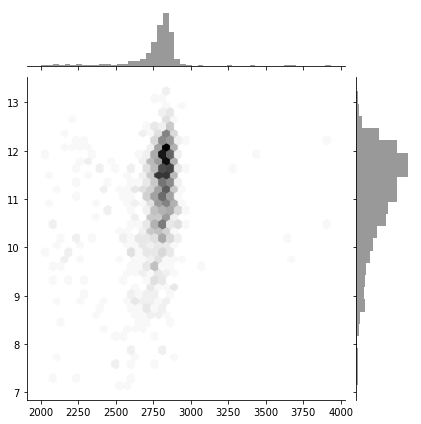

In [26]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

### Choosing pdiffs and rdiffs of 6 as the maximised values

In [37]:
dict6 = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small6.pcr.fasta", "fasta"))
print(len(dict6))
gdict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/analysis/blast_results/zymo/BED/bed_output.fasta", "fasta"))

312


In [38]:
dict6_seqs = []
for key in dict6:
    dict6_seqs.append(dict6[key].seq)
gdict_seqs = []
for key in gdict:
    gdict_seqs.append(gdict[key].seq)

In [39]:
alignments = pairwise2.align.globalms(gdict_seqs[0], dict6_seqs[0], 1, -1, -1, 0)

In [40]:
# print(format_alignment(*alignments[0]))

In [41]:
total = 0
adiffs = 0
cdiffs = 0
gdiffs = 0
tdiffs = 0
gapdiffs = 0
matches = 0
comparison = alignments[0][0:2]
for i in range(0, len(comparison[0])):
    if comparison[0][i] == "A" and comparison[1][i] != "A":
        adiffs += 1
        total += 1
    elif comparison[0][i] == "C" and comparison[1][i] != "C":
        cdiffs += 1
        total += 1
    elif comparison[0][i] == "G" and comparison[1][i] != "G":
        gdiffs += 1
        total += 1
    elif comparison[0][i] == "T" and comparison[1][i] != "T":
        tdiffs += 1
        total += 1
    elif comparison[0][i] == "-" and comparison[1][i] != "-":
        gapdiffs += 1
        total += 1
    else:
        matches += 1
        total += 1

print("The total sequence length including gaps is", total)
print("The percentage of A mutations is", 100*adiffs/total)
print("The percentage of C mutations is", 100*cdiffs/total)
print("The percentage of G mutations is", 100*gdiffs/total)
print("The percentage of T mutations is", 100*tdiffs/total)
print("The percentage of GAP mutations is", 100*gapdiffs/total)
print("The percentage of matches is", 100*matches/total)

The total sequence length including gaps is 2932
The percentage of A mutations is 3.1036834924965895
The percentage of C mutations is 2.3533424283765347
The percentage of G mutations is 3.069577080491132
The percentage of T mutations is 2.557980900409277
The percentage of GAP mutations is 4.433833560709413
The percentage of matches is 84.48158253751706


In [70]:
a_perc = []
c_perc = []
g_perc = []
t_perc = []
gap_perc = []
match_perc = []
for j in dict6_seqs:
    alignments = pairwise2.align.globalms(gdict_seqs[0], j, 1, -1, -1, 0)
    total = 0
    adiffs = 0
    cdiffs = 0
    gdiffs = 0
    tdiffs = 0
    gapdiffs = 0
    matches = 0
    comparison = alignments[0][0:2]
    for i in range(0, len(comparison[0])):
        if comparison[0][i] == "A" and comparison[1][i] != "A":
            adiffs += 1
            total += 1
        elif comparison[0][i] == "C" and comparison[1][i] != "C":
            cdiffs += 1
            total += 1
        elif comparison[0][i] == "G" and comparison[1][i] != "G":
            gdiffs += 1
            total += 1
        elif comparison[0][i] == "T" and comparison[1][i] != "T":
            tdiffs += 1
            total += 1
        elif comparison[0][i] == "-" and comparison[1][i] != "-":
            gapdiffs += 1
            total += 1
        else:
            matches += 1
            total += 1
    match_perc.append(100*matches/total)
    a_perc.append(100*adiffs/total)
    c_perc.append(100*cdiffs/total)
    g_perc.append(100*gdiffs/total)
    t_perc.append(100*tdiffs/total)
    gap_perc.append(100*gapdiffs/total)
    statistics = [match_perc, a_perc, c_perc, g_perc, t_perc, gap_perc]

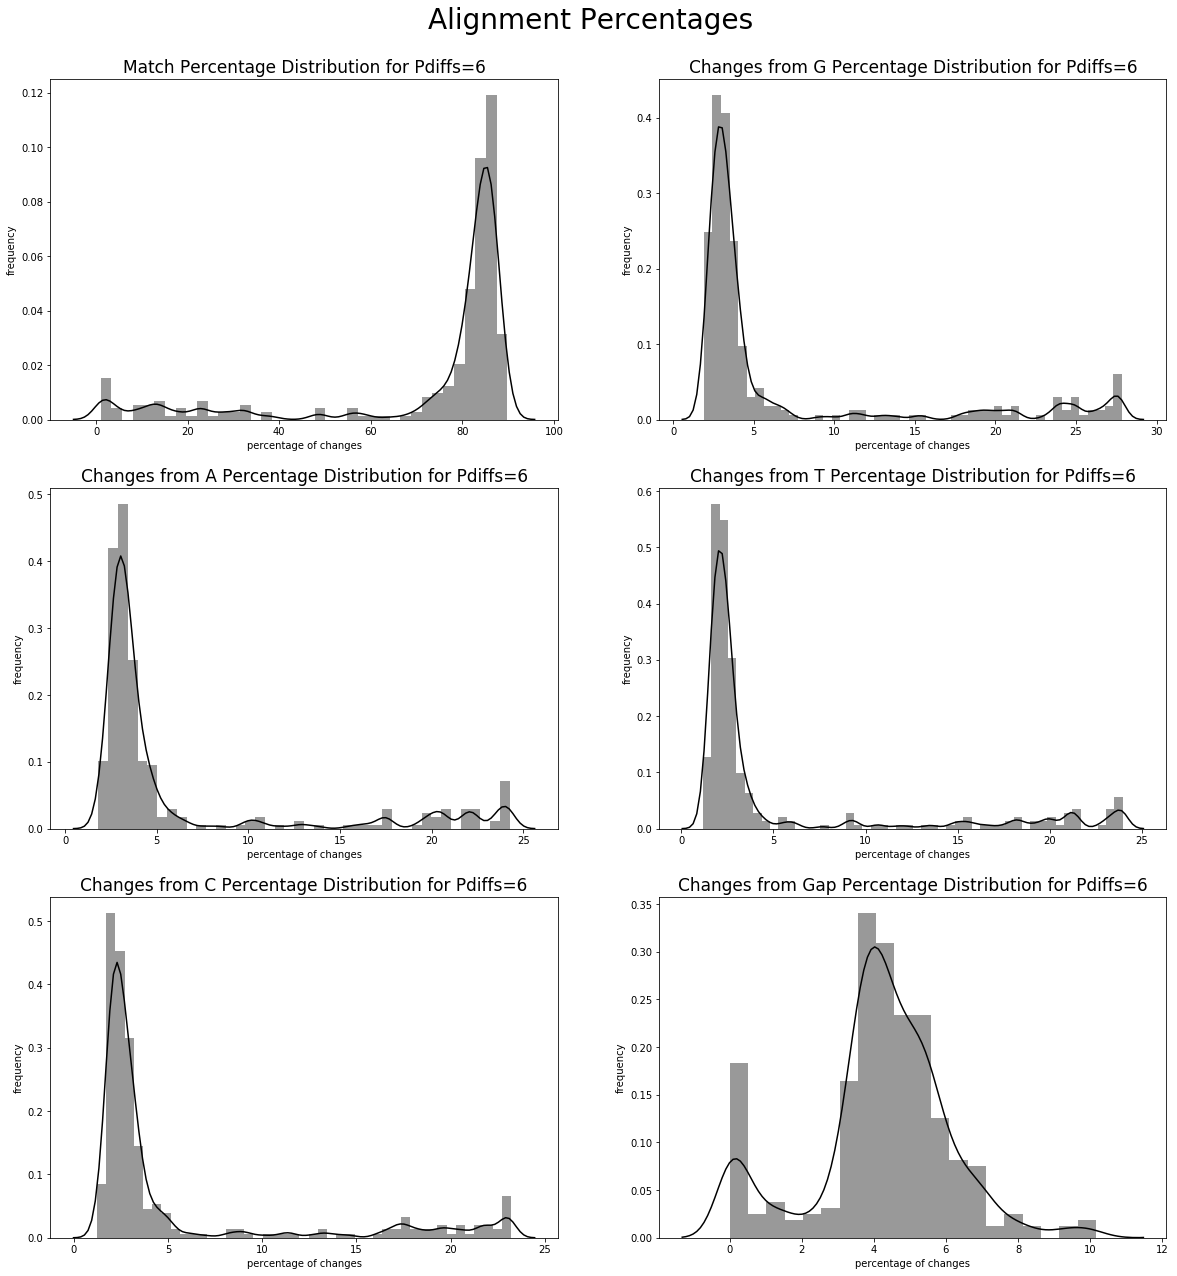

In [100]:
fg, ax = plt.subplots(3,2, figsize=(20,20))
fg.suptitle("Alignment Percentages", fontsize=28)
fg.subplots_adjust(top=0.93)

titles = ['Match Percentage Distribution for Pdiffs=6', 'Changes from A Percentage Distribution for Pdiffs=6', 'Changes from C Percentage Distribution for Pdiffs=6', 'Changes from G Percentage Distribution for Pdiffs=6', 'Changes from T Percentage Distribution for Pdiffs=6', 'Changes from Gap Percentage Distribution for Pdiffs=6']


for i in range(0, 6):
    if i < 3:
        sns.distplot(statistics[i], color='k', ax=ax[i][0])
        ax[i][0].set_title(titles[i], fontsize=17)
        ax[i][0].set(xlabel='percentage of changes', ylabel='frequency')
    else:
        sns.distplot(statistics[i], color='k', ax=ax[i-3][1])
        ax[i-3][1].set_title(titles[i], fontsize=17)
        ax[i-3][1].set(xlabel='percentage of changes', ylabel='frequency')




# sns.distplot(match_perc, color='k').set_title('Match Percentage Distribution for Pdiffs=6')
# sns.distplot(a_perc, color='k').set_title('Changes from A Percentage Distribution for Pdiffs=6')
# sns.distplot(c_perc, color='k').set_title('Changes from C Percentage Distribution for Pdiffs=6')
# sns.distplot(g_perc, color='k').set_title('Changes from G Percentage Distribution for Pdiffs=6')
# sns.distplot(t_perc, color='k').set_title('Changes from T Percentage Distribution for Pdiffs=6')
# sns.distplot(gap_perc, color='k').set_title('Changes from Gap Percentage Distribution for Pdiffs=6')

In [96]:
dict6_frame = df(columns=['Matches', 'Changes from A', 'Changes from C', 'Changes from G', 'Changes from T', 'Changes from Gap'], index=['Max', 'Min', 'Mean', 'Median'])
for i in range(0, 6):
    dict6_frame[dict6_frame.columns[i]] = [max(statistics[i]), min(statistics[i]), np.mean(statistics[i]), np.median(statistics[i])]

In [97]:
dict6_frame

,Matches,Changes from A,Changes from C,Changes from G,Changes from T,Changes from Gap
Max,89.844021,24.268380,23.197716,27.837259,23.947181,10.163514
Min,0.999286,1.818806,1.245675,1.920439,1.176064,0.000000
Mean,72.233225,6.240384,5.413001,6.638984,5.269150,4.205256
Median,83.478530,3.346156,2.660540,3.247420,2.351714,4.237867
